In [18]:
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
import h5py
import os
import astropy.units as u
import matplotlib as mpl

In [19]:
!pwd

/home1/10071/alexescamilla2244


In [20]:
mpl.rc_file('/home1/10071/alexescamilla2244/Mike_RCParams')

In [21]:
E_ff_values = np.sort(glob("/work2/10071/alexescamilla2244/frontera/CASSI_Project-2024/output/E_FF/" + "/*.hdf5"))
Diff_E_ff_values = np.sort(glob("/work2/10071/alexescamilla2244/frontera/CASSI_Project-2024/output/Diff_Mass_E_FF" + "/*.hdf5"))

In [22]:
len(Diff_E_ff_values), len(E_ff_values)

(415, 415)

In [23]:
all_snaps = np.sort(glob("/scratch3/03532/mgrudic/STARFORGE_RT/STARFORGE_v1.2/M2e4_R10/M2e4_R10_Z1_S0_A2_B0.1_I1_Res271_n2_sol0.5_42/output" + "/*.hdf5"))

In [24]:
#all_snaps

In [25]:
our_snaps = []
for file in all_snaps:
    with h5py.File(file, "r") as F:
        if "PartType5/Coordinates" in F.keys():
            our_snaps.append(file)
        

In [26]:
trimmed_snaps = our_snaps[:378]

In [27]:
len(trimmed_snaps)

378

In [28]:
def all_snaps(file1):
    for file in file1:
        with h5py.File(str(file), 'r') as F:
            values = F["SFE_Values"][:]
            mask = (~np.isnan(values)) & (values > 0)
            real = values[mask]
            x_range = np.linspace(65,2500,len(real))
            new_name = file.split("/")[-1].replace(".e_ff_range.hdf5", "")
            ax.loglog((x_range),(real), alpha=0.7, label = new_name);


    







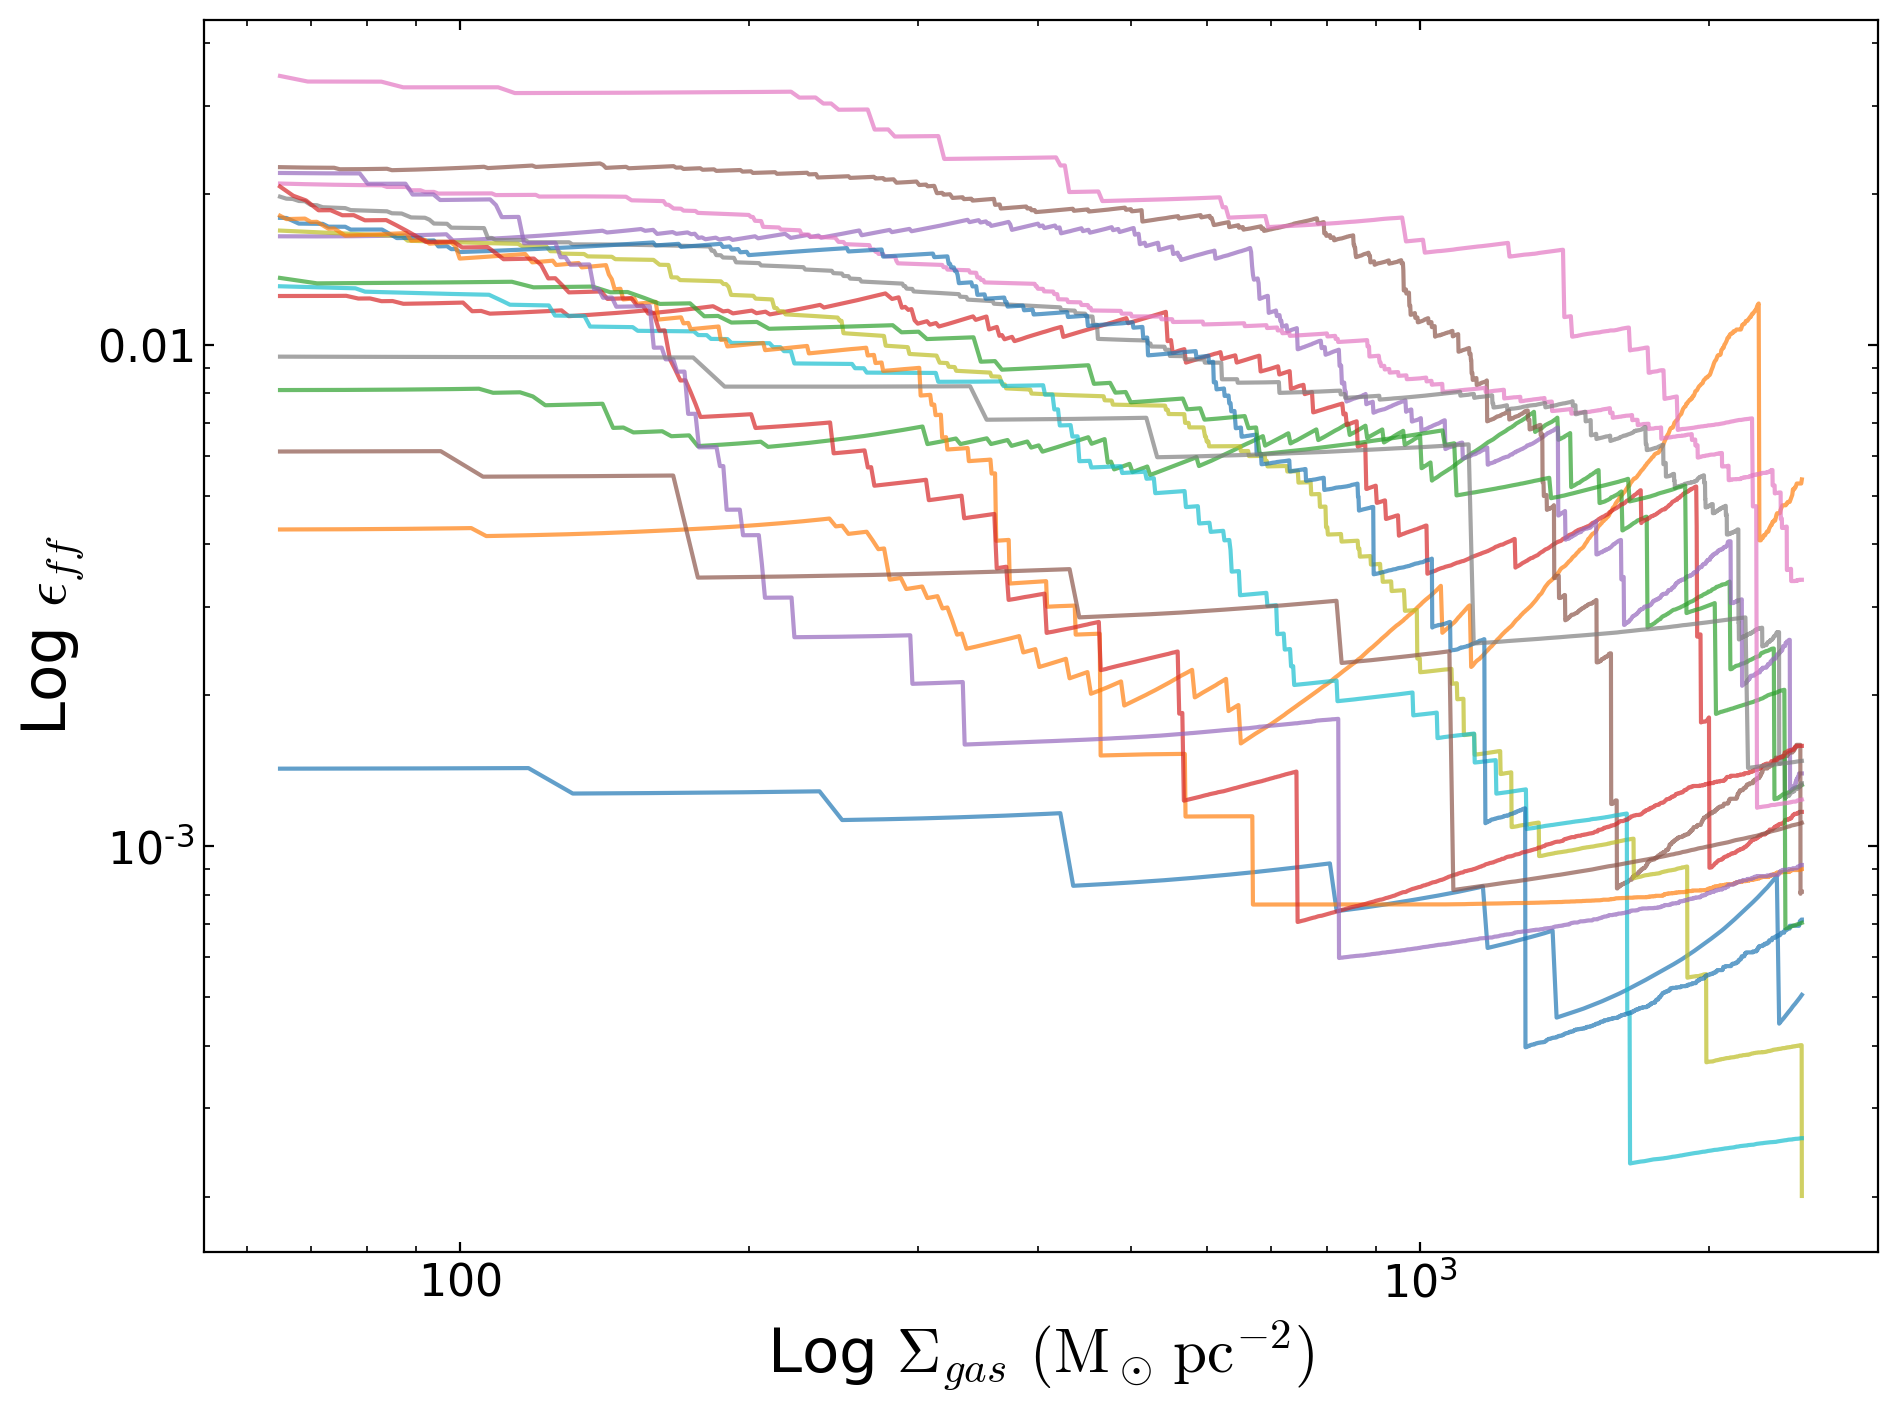

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

for i in range(0,360,20):
    all_snaps(E_ff_values[i:i+1])

ax.set_xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 22)

ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize = 22)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
plt.show();
fig.savefig('bigplotnocolor')

In [30]:
colors = plt.cm.inferno(np.linspace(0, 1, len(our_snaps)))
def color_plot(values, time_snaps):
    
    for file,j in zip(values, time_snaps):
        with h5py.File(str(file), 'r') as F:
            values = F["SFE_Values"][:]
            mask = (~np.isnan(values)) & (values > 0)
            real = values[mask]
            x_range = np.linspace(65,2500,len(real))
                  
            time = (h5py.File(str(j), "r")["Header"].attrs["Time"] * u.pc / (u.meter/u.second)).to(u.Myr)
            cidx = int(time.value / 10 * len(trimmed_snaps))
            if time.value > 3 and time.value < 5:
                ax.plot(np.log10(x_range),np.log10(real), alpha=1, c=colors[cidx], linewidth= 1.5);
            elif time.value > 5 and time.value < 7:
                ax.plot(np.log10(x_range),np.log10(real), alpha=1, c=colors[cidx], linewidth=1.5);
            elif time.value > 7 and time.value < 10:
                ax.plot(np.log10(x_range), np.log10(real), alpha=1, c=colors[cidx],linewidth=1.5);
            else:
                ax.plot(np.log10(x_range), np.log10(real), alpha=1, c=colors[cidx], linewidth=1.5);

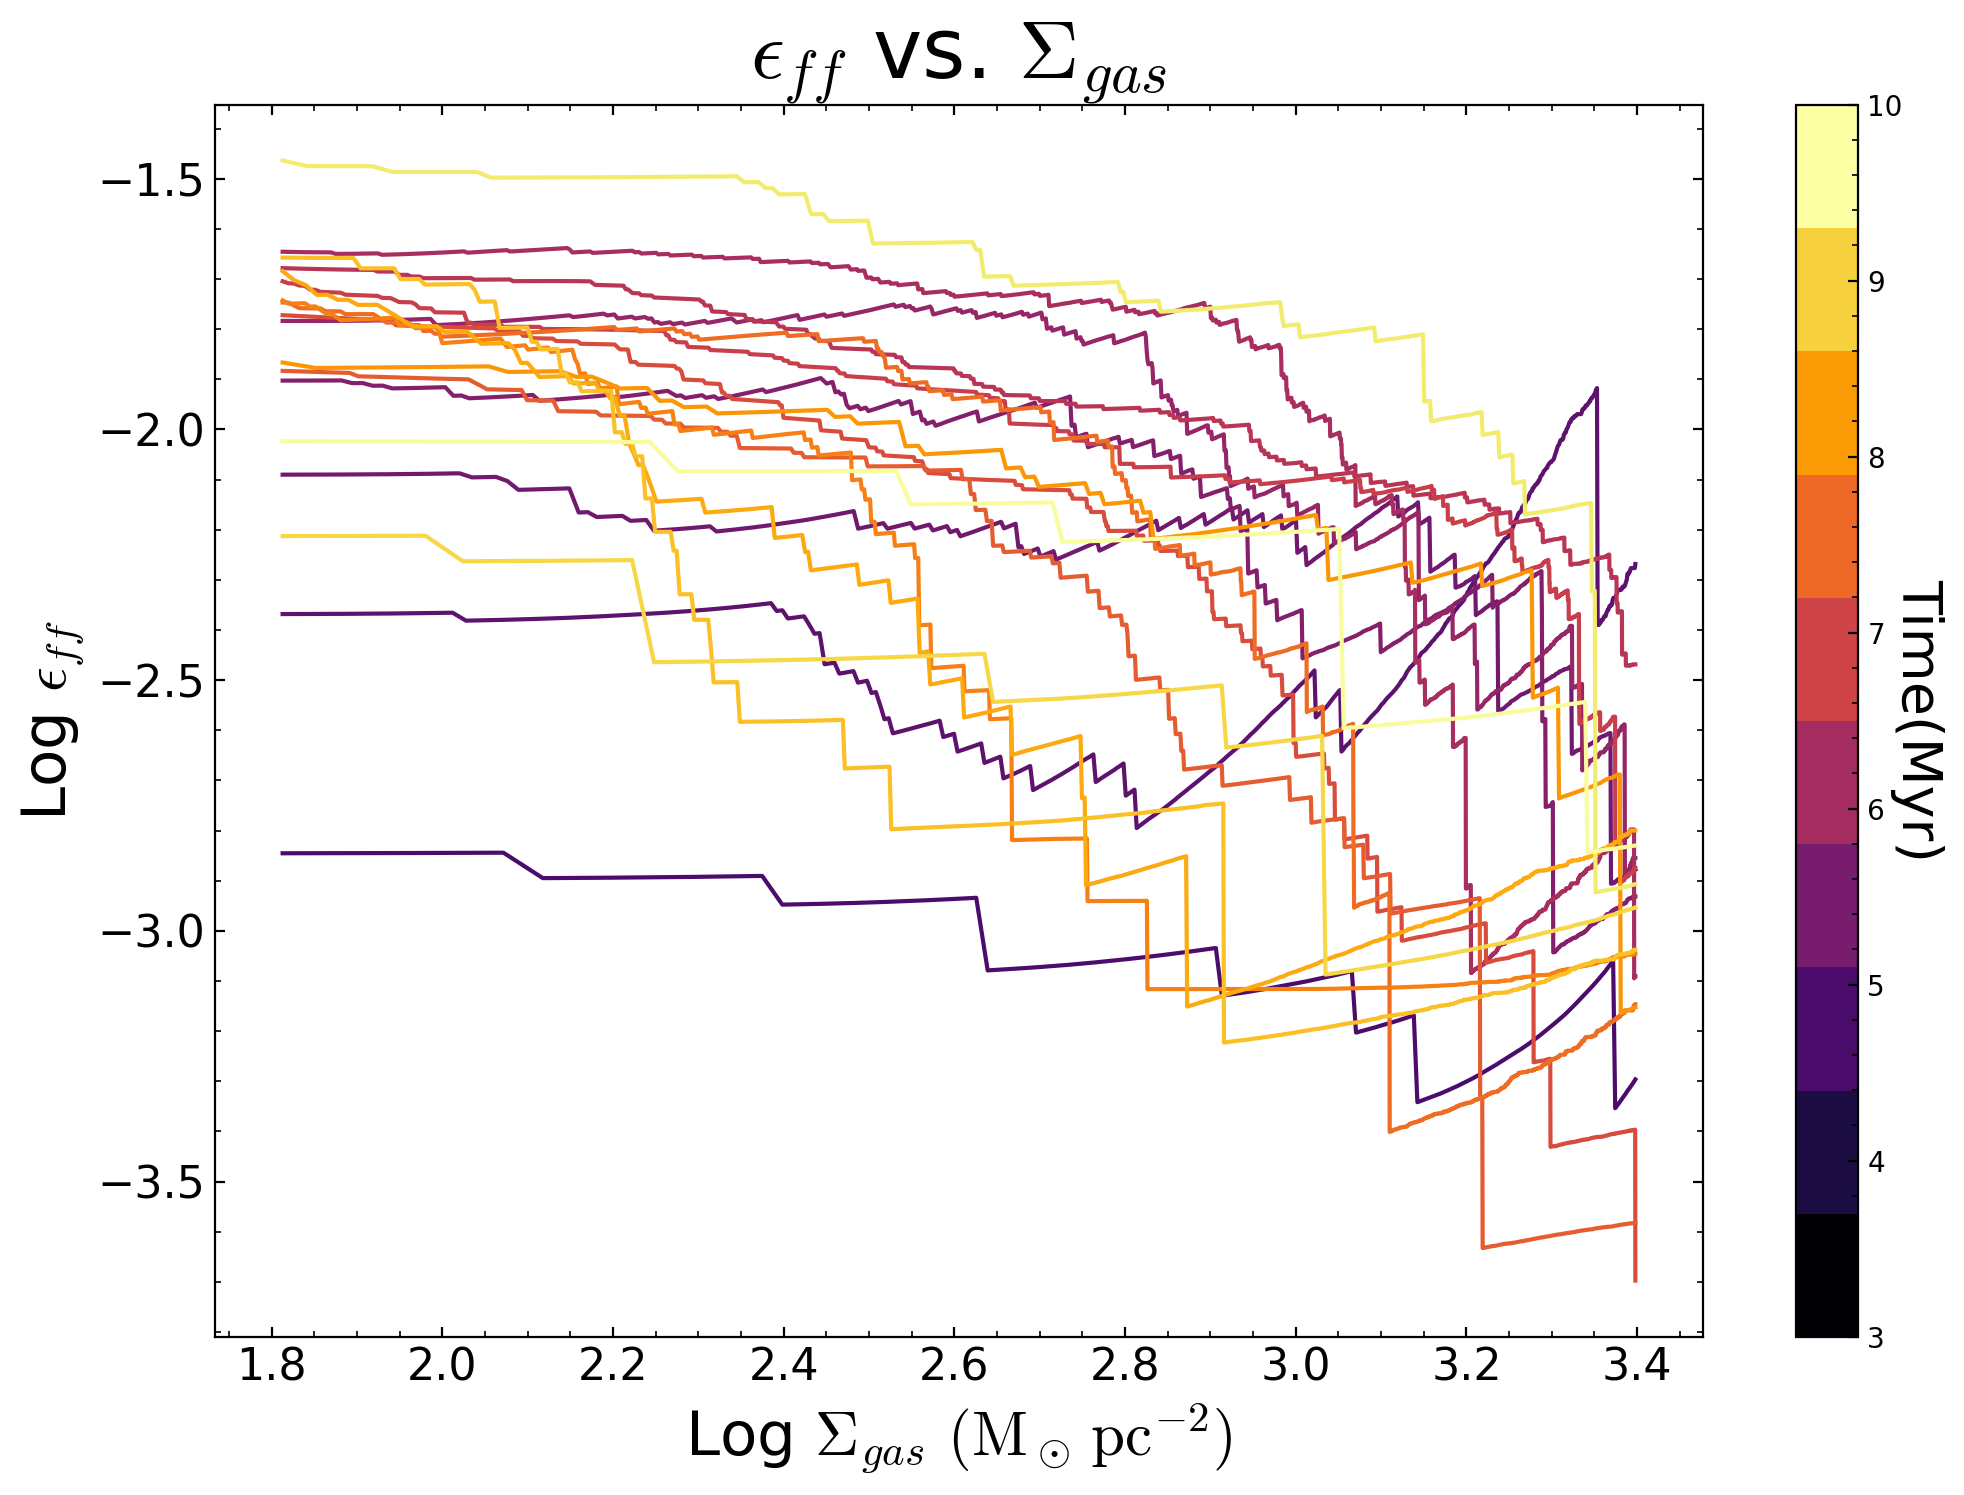

In [31]:
import matplotlib.patches as mpatches
import matplotlib as mpl
#plt.style.use('light_background')
fig, ax = plt.subplots(figsize=(12,8))


#color_plot(E_ff_values[0:1], our_snaps[0:1])
#color_plot(E_ff_values[19:20], our_snaps[19:20])
#color_plot(E_ff_values[250:260], our_snaps[250:260])
#color_plot(E_ff_values[300:310], our_snaps[300:310])

for i in range(0,360,20):
    color_plot(E_ff_values[i:i+1], our_snaps[i:i+1])

ax.set_xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 22)
ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize = 22)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])

cmap = plt.get_cmap("inferno", 10)
norm = mpl.colors.Normalize(vmin=3, vmax=10)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(3, 10, 8))
cbar.set_label('Time(Myr)', rotation=270, fontsize=20, labelpad=15)
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
ax.set_title(r"$\epsilon_{ff}$ vs. $\Sigma_{gas}$", fontsize = 30)
plt.show();
fig.savefig('new_dustemission_SFE', facecolor='white', transparent=False)

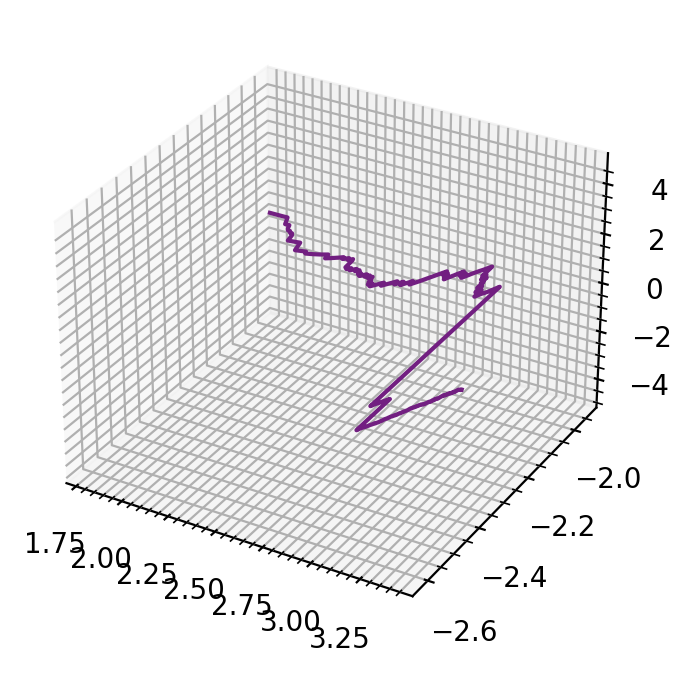

In [15]:
ax = plt.figure().add_subplot(projection='3d')
colors = plt.cm.magma(np.linspace(0, 1, len(our_snaps)))
np.random.seed(19680801)

for file,j in zip(E_ff_values[50:51], our_snaps[50:51]):
        with h5py.File(str(file), 'r') as F:
            values = F["SFE_Values"][:]
            mask = (~np.isnan(values)) & (values > 0)
            real = values[mask]
            x_range = np.linspace(65,2500,len(real))
                  
            time = (h5py.File(str(j), "r")["Header"].attrs["Time"] * u.pc / (u.meter/u.second)).to(u.Myr)
            cidx = int(time.value / 10 * len(trimmed_snaps))
            ax.plot(np.log10(x_range), np.log10(real), alpha=1, c=colors[cidx], linewidth= 1.5);

In [32]:
our_snaps

[]

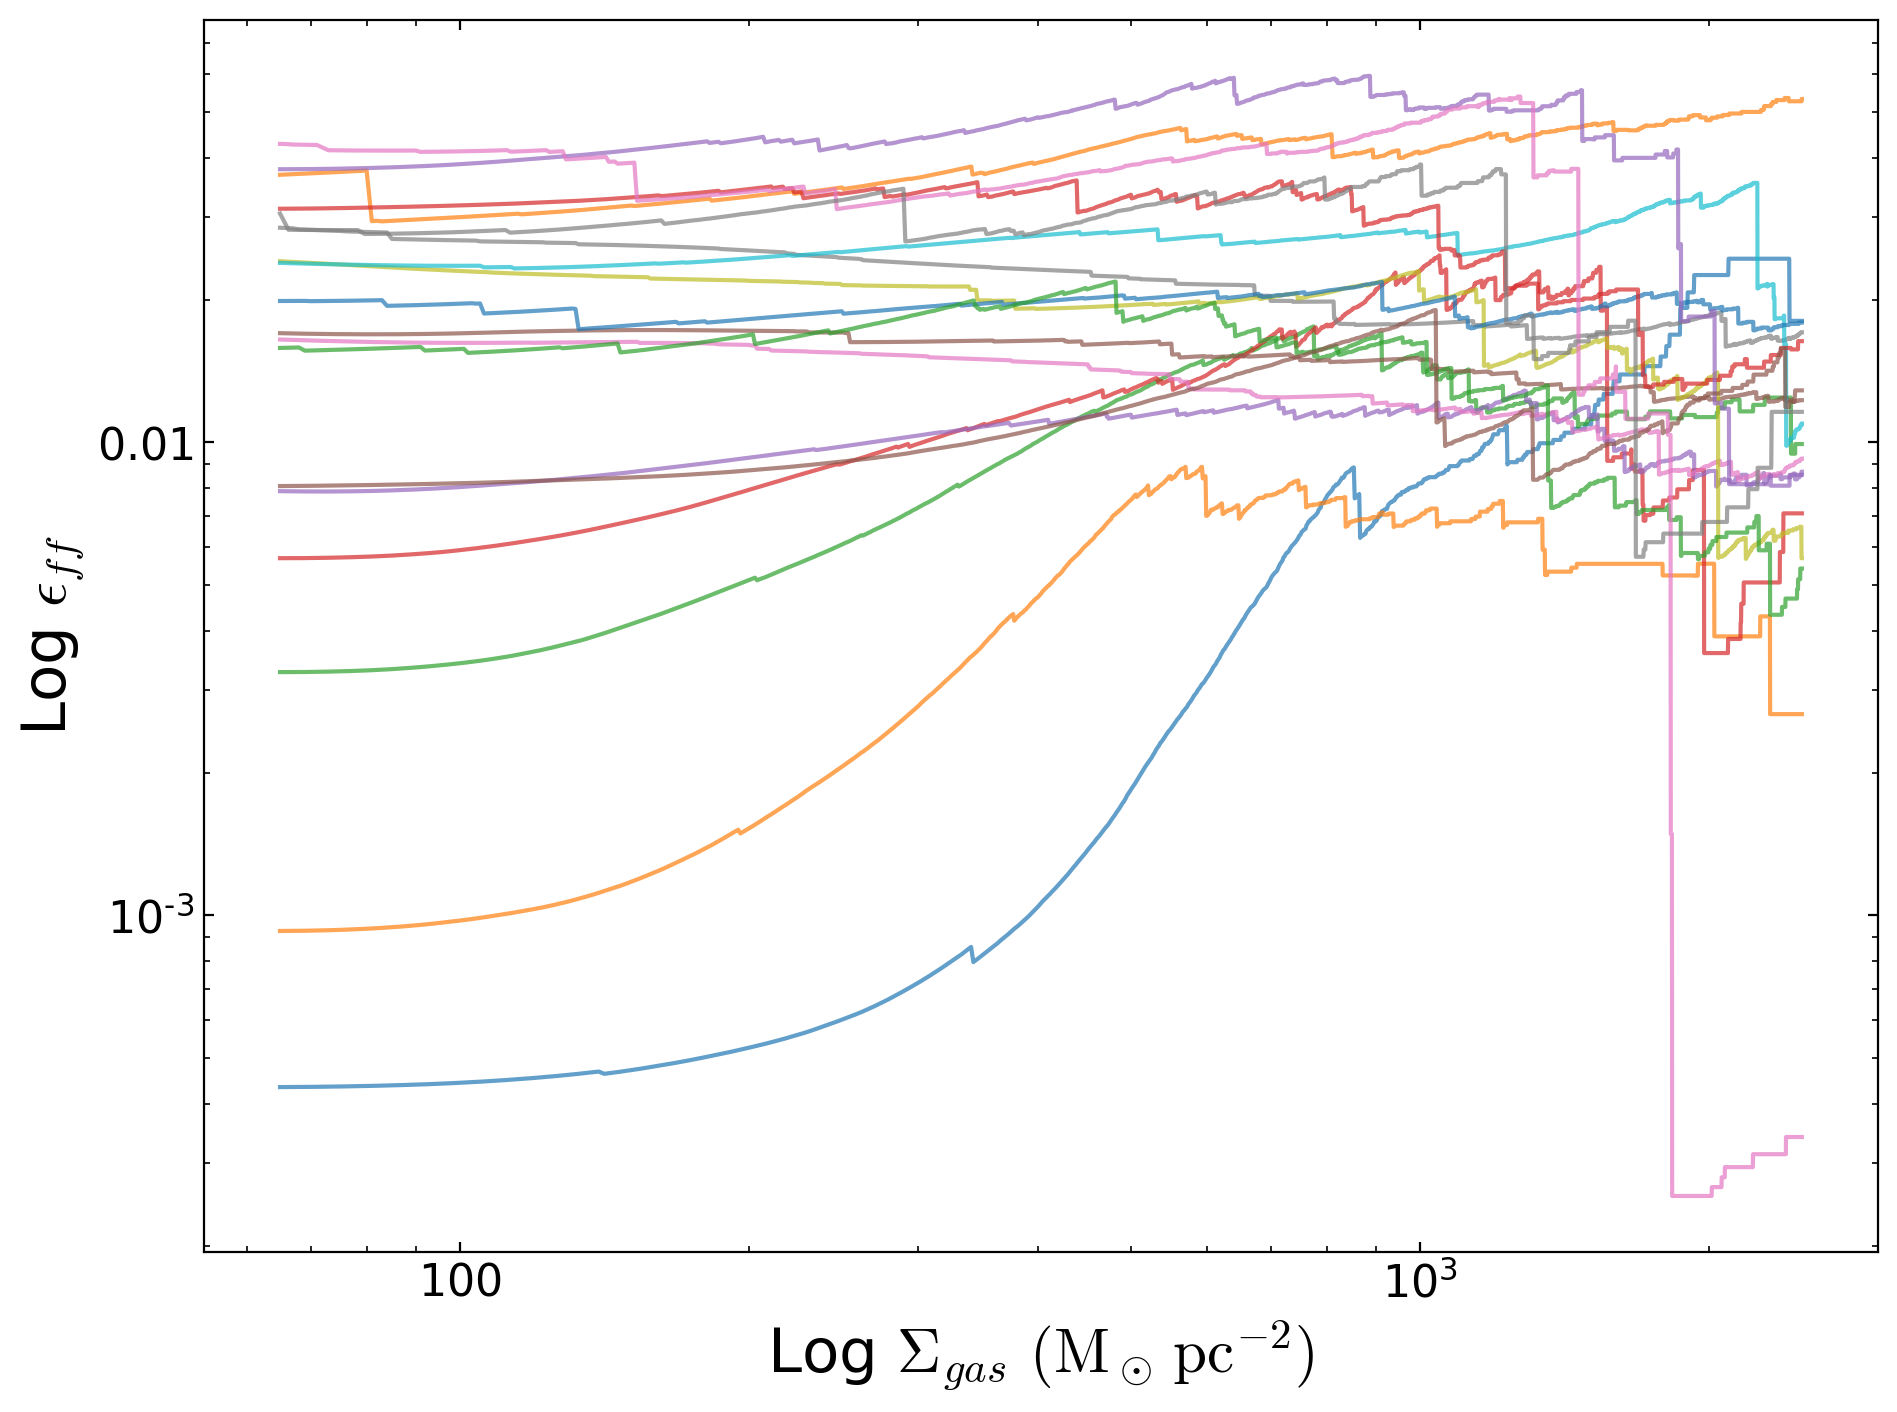

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

for i in range(0,360,20):
    all_snaps(Diff_E_ff_values[i:i+1])

ax.set_xlabel(r"Log $\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 22)

ax.set_ylabel(r"Log $\epsilon_{ff}$", fontsize = 22)
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
plt.show();
#fig.savefig('bigplotnocolor')

In [95]:
colors = plt.cm.inferno(np.linspace(0, 1, len(our_snaps)))


def all_snaps_stats_stars(file1, time_snaps):
    for file, j  in zip(file1, time_snaps):
        with h5py.File(str(file), 'r') as F:
            values = F["SFE_Values_Different_Masses"][:]
            med_mass = F["M_median"][:]
            average_mass = F["Average_YSO_Mass"][:]
            tot_mass = F["M_total"][:]
            n_yso = F["NYSOs"][:]
            x_range = np.linspace(65,2500,len(values))
            
            time = (h5py.File(str(j), "r")["Header"].attrs["Time"] * u.pc / (u.meter/u.second)).to(u.Myr)
            cidx = int(time.value / 10 * len(trimmed_snaps))
            
            if time.value > 3 and time.value < 5:
                axs[0,0].semilogx((x_range),(med_mass), alpha=0.7, c=colors[cidx]);
                axs[0,0].set_ylabel(r"$M_{median} (\rm M_\odot)$", fontsize = 15)
            
                axs[0,1].semilogx((x_range),(average_mass), alpha=0.7, c=colors[cidx]);
                axs[0,1].set_ylabel(r"$<M> (\rm M_\odot)$", fontsize = 15)
            
                axs[1,0].semilogx((x_range),(tot_mass), alpha=0.7, c=colors[cidx]);
                axs[1,0].set_ylabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
                #axs[1,0].set_xlabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
            
                axs[1,1].loglog((x_range),(n_yso), alpha=0.7, c=colors[cidx]);
                axs[1,1].set_ylabel(r"$N_{YSO}$", fontsize = 15)
                fig.text(0.5, 0.04, r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", ha='center', va='center', fontsize=20)
                #axs[1,1].set_xlabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
            elif time.value > 5 and time.value < 7:
                axs[0,0].semilogx((x_range),(med_mass), alpha=0.7, c=colors[cidx]);
                axs[0,0].set_ylabel(r"$M_{median} (\rm M_\odot)$", fontsize = 15)
            
                axs[0,1].semilogx((x_range),(average_mass), alpha=0.7, c=colors[cidx]);
                axs[0,1].set_ylabel(r"$<M> (\rm M_\odot)$", fontsize = 15)
            
                axs[1,0].semilogx((x_range),(tot_mass), alpha=0.7, c=colors[cidx]);
                axs[1,0].set_ylabel(r"$M_{tot} (\rm M_\odot)$", fontsize = 15)
                #axs[1,0].set_xlabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
            
                axs[1,1].loglog((x_range),(n_yso), alpha=0.7, c=colors[cidx]);
                axs[1,1].set_ylabel(r"$N_{YSO}$", fontsize = 15)
                #axs[1,1].set_xlabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
            elif time.value > 7 and time.value < 10:
                axs[0,0].semilogx((x_range),(med_mass), alpha=0.7, c=colors[cidx]);
                axs[0,0].set_ylabel(r"$M_{median} (\rm M_\odot)$", fontsize = 15)
            
                axs[0,1].semilogx((x_range),(average_mass), alpha=0.7, c=colors[cidx]);
                axs[0,1].set_ylabel(r"$<M> (\rm M_\odot)$", fontsize = 15)
            
                axs[1,0].semilogx((x_range),(tot_mass), alpha=0.7, c=colors[cidx]);
                axs[1,0].set_ylabel(r"$M_{tot} (\rm M_\odot)$", fontsize = 15)
                #axs[1,0].set_xlabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
            
                axs[1,1].loglog((x_range),(n_yso), alpha=0.7, c=colors[cidx]);
                axs[1,1].set_ylabel(r"$N_{YSO}$", fontsize = 15)
                #axs[1,1].set_xlabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
            else:
                axs[0,0].semilogx((x_range),(med_mass), alpha=0.7, c=colors[cidx]);
                axs[0,0].set_ylabel(r"$M_{median} (\rm M_\odot)$", fontsize = 15)
            
                axs[0,1].semilogx((x_range),(average_mass), alpha=0.7, c=colors[cidx]);
                axs[0,1].set_ylabel(r"$<M> (\rm M_\odot)$", fontsize = 15)
            
                axs[1,0].semilogx((x_range),(tot_mass), alpha=0.7, c=colors[cidx]);
                axs[1,0].set_ylabel(r"$M_{tot} (\rm M_\odot)$", fontsize = 15)
                #axs[1,0].set_xlabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
            
                axs[1,1].loglog((x_range),(n_yso), alpha=0.7, c=colors[cidx]);
                axs[1,1].set_ylabel(r"$N_{YSO}$", fontsize = 15)
                #axs[1,1].set_xlabel(r"$\Sigma_{gas}$ $(\rm M_\odot\,pc^{-2})$", fontsize = 15)
            
            
            



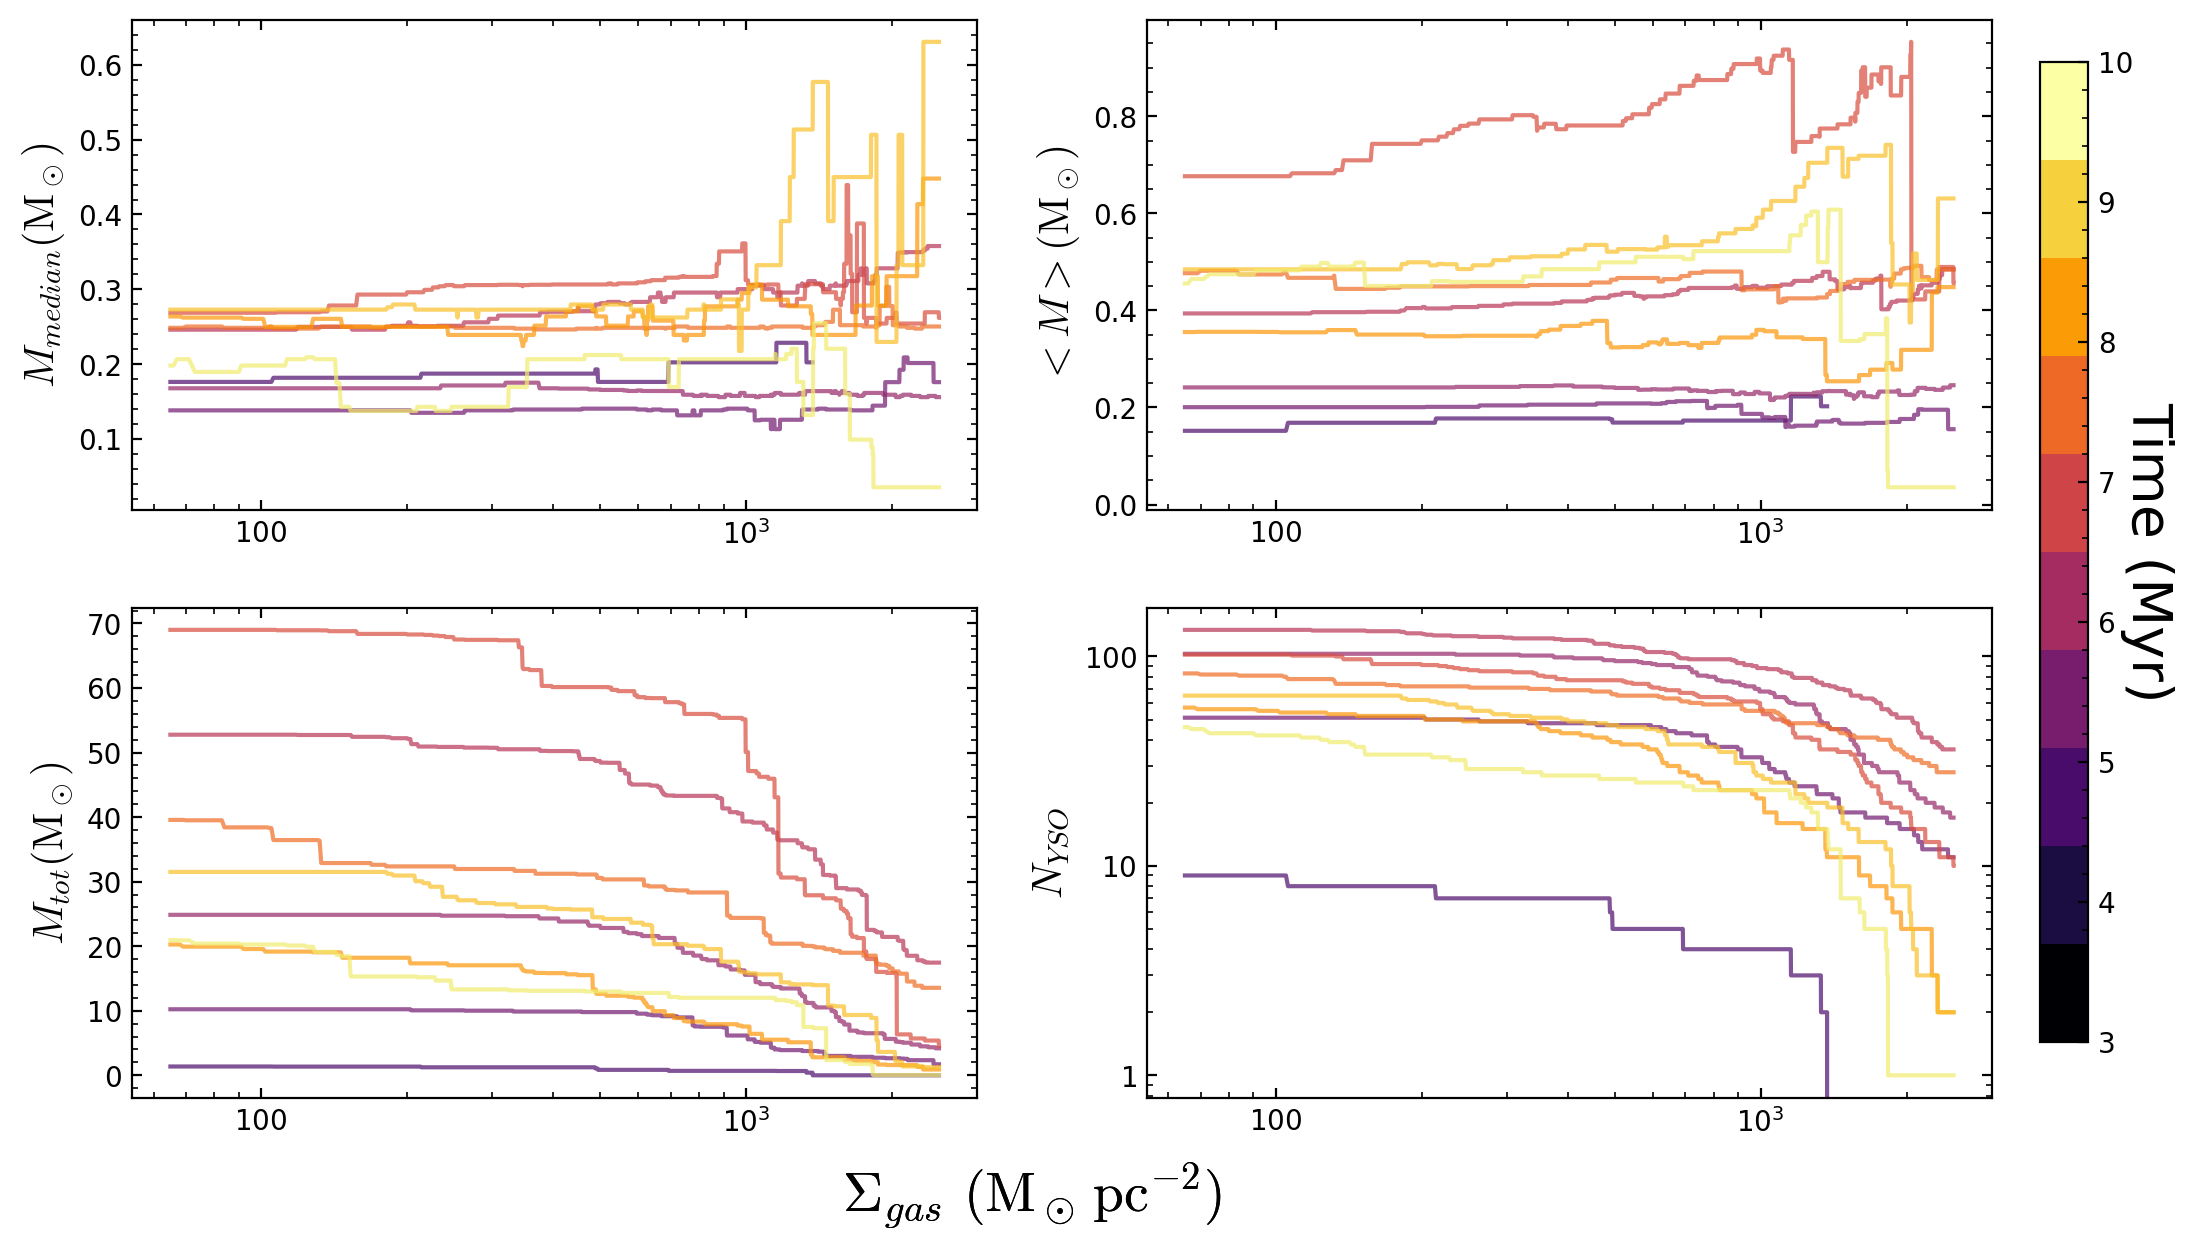

In [96]:
fig, axs = plt.subplots(2,2,figsize=(12,7))
for i in range(0,360,40):
    all_snaps_stats_stars(Diff_E_ff_values[i:i+1], our_snaps[i:i+1])
    
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])

cmap = plt.get_cmap("inferno", 10)
norm = mpl.colors.Normalize(vmin=3, vmax=10)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, ticks=np.linspace(3, 10, 8))
cbar.set_label('Time (Myr)', rotation=270, fontsize=20, labelpad=15)

plt.show()
fig.savefig('star_stats', facecolor='white', transparent=False)